Results found in file a-0.png


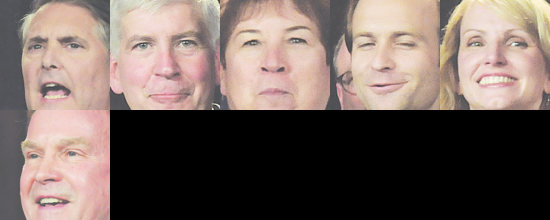

Results found in file a-1.png


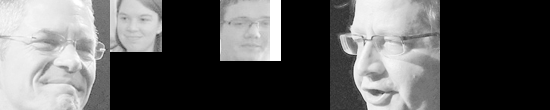

Results found in file a-10.png
But there were no faces in that file!
Results found in file a-13.png


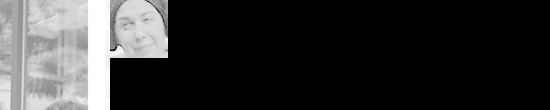

Results found in file a-2.png


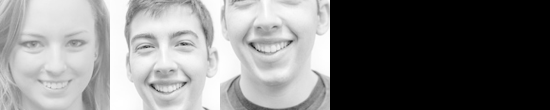

Results found in file a-3.png


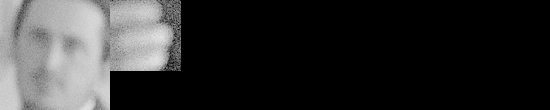

Results found in file a-8.png
But there were no faces in that file!


In [1]:
import zipfile

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('../Machine_Learning/data/haarcascade_frontalface_default.xml')

'''
Your task is to write python code
which allows one to search through the images
looking for the occurrences of keywords and faces

E.g. if you search for "pizza",
it will return a contact sheet of all of the faces
which were located on the newspaper page which mentions "pizza".
'''

images = {} # dictionary of lists indexed with filenames
# [0] : PIL Image File
# [1] : Text in image

name_list = [] # list of filenames

def unzip_images(zip_name):
    '''
    iterates over images in a zipfile and extracts and modifies global dictionary for all
    also creates a namelist containing all names of all images in the zipfile
    '''
    zf = zipfile.ZipFile(zip_name)
    for each in zf.infolist():
        images[each.filename] = [Image.open(zf.open(each.filename))]
        name_list.append(each.filename)
#         print(each.filename)
        
if __name__ == '__main__':
#     working with a global data structure using HINTS 1 and 2
    
#     unzip_images('readonly/small_img.zip')
    unzip_images('../Machine_Learning/data/images.zip')
    
    for name in name_list:
#         display(images[name][0])
#         print(name)
        img = images[name][0]
        
        images[name].append(pytesseract.image_to_string(img).replace('-\n',''))
#         using string data to omit line separators "-\n" in the data
#         modifying global data structure to append text present in each image

#         print(images[name][1])
        
        if 'Mark' in images[name][1]: 
#             using HINT 3
            print('Results found in file',name)
            
            try:
                faces = (face_cascade.detectMultiScale(np.array(img),1.35,4)).tolist()
#                 storing the bounding boxes of all faces detected in each image of iteration

                images[name].append(faces)
#                 modifying global data structure to append faces present in each image

                faces_in_each = []
                
                for x,y,w,h in images[name][2]:
                    faces_in_each.append(img.crop((x,y,x+w,y+h)))
#                     modifying local data structure in each iteration to sotre PIL Image of each face
#                     display((img.crop((x,y,x+w,y+h))).resize((110,110)))
                
                contact_sheet = Image.new(img.mode, (550,110*int(np.ceil(len(faces_in_each)/5))))
#                 contact sheet modification to display each iteration's result
                x = 0
                y = 0

                for face in faces_in_each:
                    face.thumbnail((110,110))
#                     using HINT 4
                    contact_sheet.paste(face, (x, y))
                    
                    if x+110 == contact_sheet.width:
                        x=0
                        y=y+110
                    else:
                        x=x+110
                        
                display(contact_sheet)
            except:
                print('But there were no faces in that file!')
                
# '''
# your ability to use zipfile library
# your ability to use OpenCV to detect faces,
# your ability to use tesseract to do optical character recognition, and
# your ability to use PIL to composite images together into contact sheets.
# '''

# HINT 1
# To access the newspapers in the zipfile, you must first use the Zipfile library
# to open the zipfile then iterate through the objects (newspapers) in the zipfile using .infolist().
# Try and write a simple routine to just go through the zipfile,
# printing out the name of the file as well as using display().
# Remember that the PIL.Image library can .open() files, and that items in .infolist() in the zipfile each
# appear to Python just as if they were a file (these are called "file-like" objects).

# HINT 2
# You can spend a lot of time converting between PIL.Image files and byte arrays, but you don't have to.
# Why not just store the PIL.Image objects in a global data structure, maybe a list or a dictionary indexed by name?
# Then you can further process this data structure,
# by adding in information such as the text detected on the pages or the bounding boxes behind faces.
# Come to think of it, a list of dictionary objects, where each entry in the list would have the PIL image,
# the bounding boxes, and the text discovered on the page, would be a handy way to store this data.

# HINT 3
# A quick reminder - in Python all strings are just like lists of characters.
# Kind of (remember they are immutable lists - more like tuples!).
# But this means you can use the in keyword to find substrings really easily.
# So the following statement will return True if the substring is matched: if "Christopher" in my_text

# HINT 4
# Creating the contact sheet can be a bit of a pain.
# But you can resize images without having to worry about the aspect ratio
# if you use the PIL.Image.thumbnail function.
# I used it when creating out the output images, maybe you should too! 
# And check out the lecture on the contact sheet, you want to be careful that you don't
# "walk off" the end of the images when creating a row (or column).

# Each page of the newspapers is saved as a single PNG image in a file
# These newspapers are in english, and contain a variety of stories, advertisements and images

# Trial 1

Results found in file a-0.png


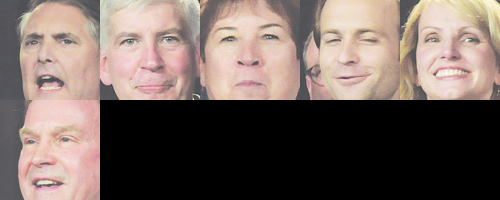

Results found in file a-1.png


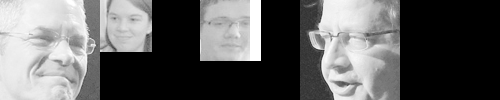

Results found in file a-10.png
But there were no faces in that file!
Results found in file a-13.png


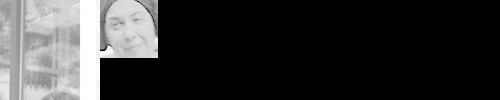

Results found in file a-2.png


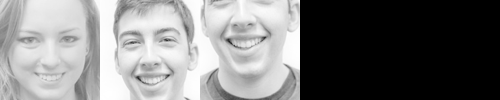

Results found in file a-3.png


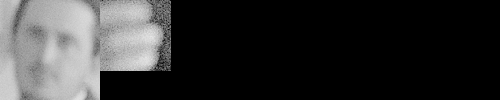

Results found in file a-8.png
But there were no faces in that file!


In [19]:
import zipfile

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('../Machine_Learning/data/haarcascade_frontalface_default.xml')

'''
Your task is to write python code
which allows one to search through the images
looking for the occurrences of keywords and faces

E.g. if you search for "pizza",
it will return a contact sheet of all of the faces
which were located on the newspaper page which mentions "pizza".
'''

images = {} # dictionary of lists indexed with filenames
# [0] : PIL Image File
# [1] : Text in image

#name_list = []
file_path = "../Machine_Learning/data/images.zip"
search_name = "Mark"
#faces_in_each = []

zf = zipfile.ZipFile(file_path)
for each in zf.infolist():
    images[each.filename] = [Image.open(zf.open(each.filename))]
    #name_list.append(each.filename)


    
for name in list(images.keys()):
#         display(images[name][0])
#         print(name)
    img = images[name][0]
        
    images[name].append(pytesseract.image_to_string(img).replace('-\n',''))
#         using string data to omit line separators "-\n" in the data
#         modifying global data structure to append text present in each image

#         print(images[name][1])
        
    if search_name in images[name][1]: 
#             using HINT 3
        print('Results found in file',name)
            
        try:
            faces = (face_cascade.detectMultiScale(np.array(img),1.35,4)).tolist()
#                 storing the bounding boxes of all faces detected in each image of iteration

            images[name].append(faces)
#                 modifying global data structure to append faces present in each image

            faces_in_each = []
                
            for x,y,w,h in images[name][2]:
                faces_in_each.append(img.crop((x,y,x+w,y+h)))
#                     modifying local data structure in each iteration to sotre PIL Image of each face
#                     display((img.crop((x,y,x+w,y+h))).resize((110,110)))
                
            contact_sheet = Image.new(img.mode, (500,100*int(np.ceil(len(faces_in_each)/5))))
#                 contact sheet modification to display each iteration's result
            x = 0
            y = 0

            for face in faces_in_each:
                face.thumbnail((100,100))
#                     using HINT 4
                contact_sheet.paste(face, (x, y))
                    
                if x+100 == contact_sheet.width:
                    x=0
                    y=y+100
                else:
                    x=x+100
                        
            display(contact_sheet)
        except:
            print('But there were no faces in that file!')

In [ ]:
# Preparation
# dict of lists,k==filename, v==[[0]==image, [1]==text,[2]==face]
images_lib = {}
# path
file_path = "readonly/images.zip"
# search variable
search_name = "Mark"
# unzip and build dict
files = zipfile.ZipFile(file_path)
for item in files.infolist():
    images_lib[item.filename] = [Image.open(files.open(item.filename))]

In [ ]:
# main()
for filename in list(images_lib.keys()):
    pic = images_lib[filename][0]
    images_lib[filename].append(pytesseract.image_to_string(pic).replace('-\n','')) #append text
    if search_name in images_lib[filename][1]:
        print("Results found in file",filename)
        
        #try:
        face = (face_cascade.detectMultiScale(np.array(pic),1.35,4)).tolist()
        images_lib[filename].append(face)
        face_list = []
        for x,y,w,h in images_lib[filename][2]:
            face_list.append(pic.crop((x,y,x+w,y+h)))
                
        contact_sheet = Image.new(pic.mode, (500,100*int(np.ceil(len(face_list)/5))))
        x = 0
        y = 0            
        for item in face_list:
            item.thumbnail((100,100))
            contact_sheet.paste(item, (x, y))                    
            if x+100 == contact_sheet.width:
                x=0
                y=y+100
            else:
                x=x+100         
        display(contact_sheet)
        #except:
        #    print('But there were no faces in that file!')